In [48]:
import geopandas as gpd
import pandas as pd

Load census tracts shape file, acquired from the NYC website here:
https://www.nyc.gov/site/planning/data-maps/open-data/census-download-metadata.page

In [49]:
census_tracts = gpd.read_file("nyct2020_23a/nyct2020.shp")
census_tracts

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape_Leng,Shape_Area,geometry
0,1,1,Manhattan,000100,1000100,NaN,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.048501,1.844421e+06,"MULTIPOLYGON (((972081.788 190733.467, 972184...."
1,2.01,1,Manhattan,000201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.495247,9.723121e+05,"POLYGON ((988548.218 197770.375, 987978.808 19..."
2,6,1,Manhattan,000600,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,6976.286456,2.582705e+06,"POLYGON ((986961.185 199553.643, 987206.139 19..."
3,14.01,1,Manhattan,001401,1001401,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,5075.332000,1.006117e+06,"POLYGON ((987475.016 200297.218, 987705.443 20..."
4,14.02,1,Manhattan,001402,1001402,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4459.156019,1.226206e+06,"POLYGON ((988387.669 201258.312, 988621.002 20..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,77,5,Staten Island,007700,5007700,NaN,St. George-New Brighton,SI0101,SI01,SI01 North Shore (CD 1 Equivalent),36085007700,7325.091410,2.674908e+06,"POLYGON ((960079.550 172579.473, 960047.713 17..."
2321,19.02,4,Queens,001902,4001902,NaN,Long Island City-Hunters Point,QN0201,QN02,QN02 Long Island City-Sunnyside-Woodside (CD 2...,36081001902,5659.156615,1.909110e+06,"POLYGON ((1001743.809 211953.007, 1001806.690 ..."
2322,171.01,4,Queens,017101,4017101,NaN,Sunnyside Yards (South),QN0261,QN02,QN02 Long Island City-Sunnyside-Woodside (CD 2...,36081017101,22732.905385,8.783519e+06,"POLYGON ((1009266.586 212445.412, 1008736.256 ..."
2323,475,4,Queens,047500,4047500,NaN,Elmhurst,QN0401,QN04,QN04 Elmhurst-Corona (CD 4 Approximation),36081047500,8890.142310,3.028836e+06,"POLYGON ((1018955.769 206946.191, 1019047.521 ..."


<Axes: >

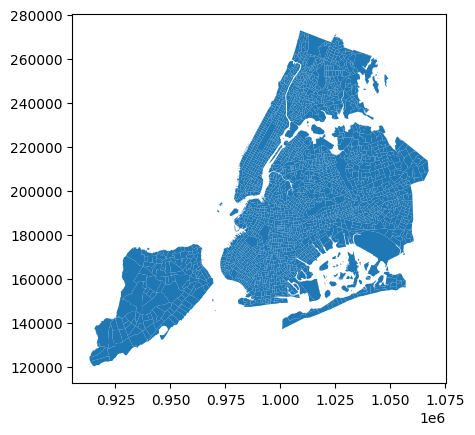

In [50]:
census_tracts.plot()

You'll notice the map projection (coordinate reference system or CRS) is EPSG:2263 (Name: NAD83 / New York Long Island (ftUS))

In [51]:
census_tracts.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Here we convert to the same Coordinate Reference System (CRS) as the bike lane data. Notice how the axes have changed to Lat/Long.

<Axes: >

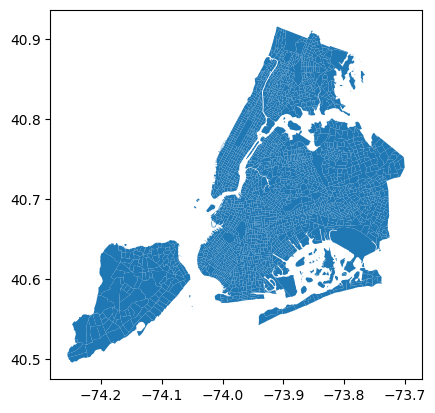

In [57]:
# EPSG:4326 is the standard for lat/long (this is the system that the bikeland data is in)
census_tracts = census_tracts.to_crs("EPSG:4326")
census_tracts.plot()

Load data on bikelanes in NYC

In [54]:
# load bike lanes
bikelanes_raw = pd.read_csv("bikelanesunfil.csv", on_bad_lines='skip')

# remove malformed line
bikelanes_raw = bikelanes_raw[~bikelanes_raw.the_geom.str.contains("MULTILI717274751")]

# convert strong to geom
bikelanes_raw['the_geom'] = gpd.GeoSeries.from_wkt(bikelanes_raw['the_geom'],crs="EPSG:4326")
bikelanes = gpd.GeoDataFrame(bikelanes_raw, geometry='the_geom')

# display
bikelanes

,the_geom,segmentid,Shape_Le_1,boro,street,fromstreet,tostreet,onoffst,facilitycl,allclasses,bikedir,lanecount,ft_facilit,tf_facilit,ft2facilit,tf2facilit,comments
0,"MULTILINESTRING ((-74.24993 40.50088, -74.2496...",53,131.771990,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
1,"MULTILINESTRING ((-74.24916 40.49872, -74.2493...",57,268.689582,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
2,"MULTILINESTRING ((-74.24935 40.49944, -74.2496...",59,420.193253,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
3,"MULTILINESTRING ((-74.25185 40.50281, -74.2517...",61,238.242198,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
4,"MULTILINESTRING ((-74.25133 40.50229, -74.2499...",64,646.293832,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20819,"MULTILINESTRING ((-73.75709 40.76236, -73.7571...",233514,20.079888,4,NORTHERN BLVD,DOUGLASTON PKWY,223 ST,ON,I,I,2,2,Protected Path,Protected Path,NaN,NaN,NaN
20820,"MULTILINESTRING ((-73.75580 40.76266, -73.7559...",233466,41.474371,4,CROSS IS PKWY,NORTHERN BLVD,TOTTEN AV,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
20821,"MULTILINESTRING ((-73.96753 40.68177, -73.9675...",163713,30.584273,3,VANDERBILT AV,PACIFIC ST,ATLANTIC AV,ON,II,II,2,2,Curbside,Standard,NaN,NaN,NaN
20822,"MULTILINESTRING ((-73.96748 40.68159, -73.9676...",163714,236.451695,3,VANDERBILT AV,PACIFIC ST,ATLANTIC AV,ON,II,II,2,2,Curbside,Standard,NaN,NaN,NaN


<Axes: >

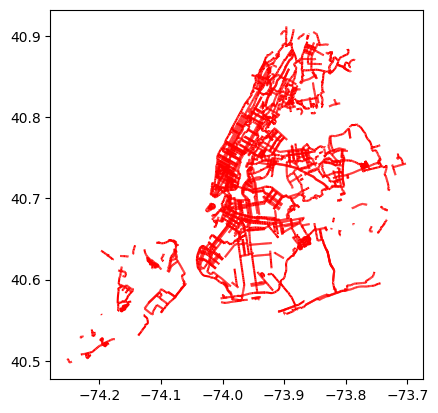

In [62]:
bikelanes.plot(color='red')

Do a spatial inner join using the intersections operation.

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.intersects.html

But there are many other spatial operations you can do.

In [60]:
# spatial join
bike_lanes_in_census_tracts = census_tracts.sjoin(bikelanes, how="inner", predicate='intersects')
bike_lanes_in_census_tracts

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,...,onoffst,facilitycl,allclasses,bikedir,lanecount,ft_facilit,tf_facilit,ft2facilit,tf2facilit,comments
1,2.01,1,Manhattan,000201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,ON,I,I,2,2,Protected Path,Protected Path,NaN,NaN,NaN
1,2.01,1,Manhattan,000201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
2305,2.02,1,Manhattan,000202,1000202,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
1,2.01,1,Manhattan,000201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,ON,II,II,2,2,Standard,Standard,NaN,NaN,NaN
2305,2.02,1,Manhattan,000202,1000202,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,ON,II,II,2,2,Standard,Standard,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,687,4,Queens,068700,4068700,NaN,Rego Park,QN0601,QN06,QN06 Forest Hills-Rego Park (CD 6 Approximation),...,ON,I,I,2,2,Protected Path,Protected Path,NaN,NaN,NaN
2324,687,4,Queens,068700,4068700,NaN,Rego Park,QN0601,QN06,QN06 Forest Hills-Rego Park (CD 6 Approximation),...,ON,I,I,2,2,Protected Path,Protected Path,NaN,NaN,NaN
2324,687,4,Queens,068700,4068700,NaN,Rego Park,QN0601,QN06,QN06 Forest Hills-Rego Park (CD 6 Approximation),...,ON,I,I,2,2,Protected Path,Protected Path,NaN,NaN,NaN
2324,687,4,Queens,068700,4068700,NaN,Rego Park,QN0601,QN06,QN06 Forest Hills-Rego Park (CD 6 Approximation),...,ON,I,I,2,2,Protected Path,Protected Path,NaN,NaN,NaN


Notice that we have 26270 rows in the final dataframe...but only 20824 bike lanes and only 2325 census tracts.

A bike lane intersects with multiple census tracts. I believe resulting data frame using the intersects method creates a new row for each intersection.